# Financial Engineering and Risk Management Part III
---
## Interest Rate Instruments Notebook 2
---
This notebook serves as a guide for answering the programming questions of the quiz "Interest Rate Instruments Assignment Part IV". The basic structure of the code has been provided and you will only be required to code some of the missing parts. This notebook is the continuation of "Interest Rate Instruments Notebook 1". Although they cover different topics, we recommend you to complete the first the previous notebook as some of the code you write can be reused here.

The main objective of this assignment is to do regression analysis on Libor rates data, both analytically and using gradient descent.

After completing this notebook, you will be able to:
+ Learn how to fit a linear model in Python.
+ Compute the $R^2$ of the regression.
+ Visually compare real vs fitted values.
+ Implement a simple gradient descent (GD) optimization routine.
+ Appreciate the importance of the learning rate of the GD.

Most of the code is similar to the one used by Prof. Hirsa in the videos. We invite you to carefully study the lectures before going through the notebook.

Once that you are confident that the notebook is running correctly, please input your answers manually on the quiz "Interest Rate Instruments Assignment Part IV".

If you wish to run this notebook (as it is) on your local computer you will need to have installed Python 3.6, Jupyter notebooks, and the following Python packages:

* numpy
* pandas
* matplotlib
* sklearn

You will also need to download the csv file "swapLiborData.csv" and place it in the same folder as this Jupyter notebook.

### Import Python modules

In [1]:
import numpy as np # for fast vector computations
import pandas as pd # for easy data analysis
import matplotlib.pyplot as plt # for plotting
from sklearn import linear_model # for linear regression

### Reading data from a csv file and doing some preprocessing

See Interest Rate Instruments Notebook 1 for more details.

In [2]:
df = pd.read_csv('swapLiborData.csv')
df['Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['Date'],'D')
df.head()

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,2014-01-02,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,2014-01-03,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,2014-01-06,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,2014-01-07,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,2014-01-08,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


### Auxiliary function from the previous module

Write a function that given two dates d1 <= d2, returns a dataframe with all the Libor rates in that time interval. **Hint:** You can use the same code you wrote in Notebook 1.

In [3]:
def libor_rates_time_window(df, d1, d2):
    ''' Retrieve the Libor rates (all terms) for the date window d1 to d2. '''
    
    sub_df = pd.DataFrame()
    
    ###############################################################
    ###############################################################
    # your code starts here
    ###############################################################
    
    sub_df = df[df['Date'] >= d1]
    sub_df = sub_df[sub_df['Date'] <= d2]
    sub_df = sub_df.iloc[:,:6]

    ###############################################################
    # your code ends here
    ###############################################################
    ###############################################################
    
    return sub_df

### Linear regression analysis
#### Questions 1 to 8 of the quiz "Interest Rate Instruments Assignment Part IV"

We will now analyze the relation between some Libor rates using linear regression. The underlying model that we assume is 

$y = b_0 + b_1 x_1 + \ldots + b_p x_p + \epsilon$,

where $y$ is our target variable, $x_1,\ldots,x_p$ are the explanatory variables, $b_0, b_1, \ldots, b_p$ are real coefficients, and $\epsilon$ is a random error with mean 0 and finite variance. This analysis is analogous to the one done in the videos for Swap rates.

We first select a time window and we extract the data using the auxiliary function.

In [4]:
# we fix a time window
d1 = '2014-01-01'
d2 = '2016-05-24'

In [5]:
# we extract the data for the time window
sub_df = libor_rates_time_window(df, d1, d2)
sub_df.head()

,Date,US0001M,US0002M,US0003M,US0006M,US0012M
0,2014-01-02,0.1683,0.21250,0.24285,0.3464,0.5826
1,2014-01-03,0.1647,0.20995,0.23985,0.3452,0.5846
2,2014-01-06,0.1625,0.20825,0.23935,0.3445,0.5854
3,2014-01-07,0.1615,0.20820,0.24210,0.3447,0.5866
4,2014-01-08,0.1610,0.20750,0.24040,0.3452,0.5856


We first regress the 6-month Libor rate against the 2-month Libor rate for the above time window. That is,

$L_6 = b_0 + b_1 L_2 + \epsilon$,

where $L_n$ is the n-month Libor rate. Write some code to complete this task. Your code should report the fitted values of the intercept $b_0$, the regression coefficient $b_1$, and the $R^2$ for the regression. **Note**: $R^2$ should be in $[0,1]$, **not** in percentage.

**Hint**: use the **linear_model** module from sklearn.

In [6]:
# the rate we want to predict
y_name = ['US0006M']
# the regressor
x_name = ['US0002M']

# your code should report the following variables:
b_0 = 0. # these are only initial values!
b_1 = 0.
R_2 = 0.

###############################################################
###############################################################
# your code starts here
###############################################################

x = sub_df[x_name]
y = sub_df[y_name]
regr = linear_model.LinearRegression()
regr.fit(x, y)
b_0 = regr.intercept_[0]
b_1 = regr.coef_[0][0]
R_2 = regr.score(x, y)

###############################################################
# your code ends here
###############################################################
###############################################################

#### Question 1
Input manually on the quiz page.

In [7]:
# question 1
print('b_0 = ' + str(np.round(b_0, 4)))

b_0 = 0.019


#### Question 2
Input manually on the quiz page.

In [8]:
# question 2
print('b_1 = ' + str(np.round(b_1, 4)))

b_1 = 1.6963


#### Question 3
Input manually on the quiz page.

In [9]:
# question 3
print('R_2 = ' + str(np.round(R_2, 4)))

R_2 = 0.966


The following part is **optional**. Compute the fitted values $\hat y$ and plot them side to side the real $y$.

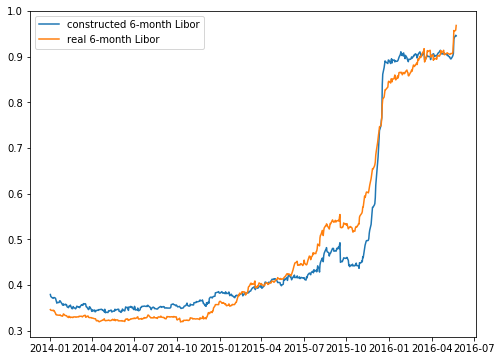

In [10]:
###############################################################
###############################################################
# your code starts here
###############################################################

y_hat = b_0 + x * b_1
plt.figure(figsize=(8,6))
plt.plot(sub_df.Date, y_hat)
plt.plot(sub_df.Date, y)
plt.legend(['constructed 6-month Libor', 'real 6-month Libor'])
plt.show()

###############################################################
# your code ends here
###############################################################
###############################################################

Now, modify your previous code to regress the 12-month Libor rate against the 2, 3, and 6-month Libor rates. That is,

$L_{12} = b_0 + b_1 L_2 + b_2 L_3 + b_3 L_6 + \epsilon$,

where $L_n$ is the n-month Libor rate. Your code should report the fitted values of the intercept $b_0$, the regression coefficients $b_1, b_2, b_3$, and the $R^2$ for the regression. **Note**: $R^2$ should be in $[0,1]$, **not** in percentage.

In [11]:
# the rate we want to predict
y_name = ['US0012M']
# the regressors
x_name = ['US0002M', 'US0003M', 'US0006M']

# your code should report the following variables:
b_0 = 0. # these are only initial values!
b_1 = 0.
b_2 = 0.
b_3 = 0.
R_2 = 0.

###############################################################
###############################################################
# your code starts here
###############################################################

x = sub_df[x_name]
y = sub_df[y_name]
regr = linear_model.LinearRegression()
regr.fit(x, y)
b_0 = regr.intercept_[0]
b_1 = regr.coef_[0][0]
b_2 = regr.coef_[0][1]
b_3 = regr.coef_[0][2]
R_2 = regr.score(x, y)

###############################################################
# your code ends here
###############################################################
###############################################################

#### Question 4
Input manually on the quiz page.

In [12]:
# question 4
print('b_0 = ' + str(np.round(b_0, 4)))

b_0 = 0.2024


#### Question 5
Input manually on the quiz page.

In [13]:
# question 5
print('b_1 = ' + str(np.round(b_1, 4)))

b_1 = 0.4255


#### Question 6
Input manually on the quiz page.

In [14]:
# question 6
print('b_2 = ' + str(np.round(b_2, 4)))

b_2 = -1.6767


#### Question 7
Input manually on the quiz page.

In [15]:
# question 7
print('b_3 = ' + str(np.round(b_3, 4)))

b_3 = 2.0576


#### Question 8
Input manually on the quiz page.

In [16]:
# question 8
print('R_2 = ' + str(np.round(R_2, 4)))

R_2 = 0.9913


The following part is **optional**. Compute the fitted values $\hat y$ and plot them side to side the real $y$.

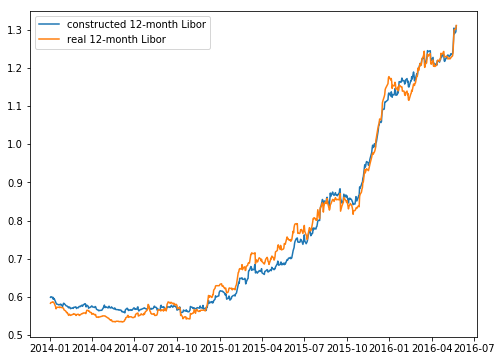

In [17]:
###############################################################
###############################################################
# your code starts here
###############################################################

y_hat = b_0 + x.US0002M * b_1 + x.US0003M * b_2 + x.US0006M * b_3
plt.figure(figsize=(8,6))
plt.plot(sub_df.Date, y_hat)
plt.plot(sub_df.Date, y)
plt.legend(['constructed 12-month Libor', 'real 12-month Libor'])
plt.show()

###############################################################
# your code ends here
###############################################################
###############################################################

### The mean squared error surface and its gradient
#### Questions 9 to 15 of the quiz "Interest Rate Instruments Assignment Part IV"

For visualization purposes, we will work on the case of simple regression, that is

$y = b_0 + b_1 x + \epsilon$.

Assume that you have $n$ data points $(x_1,y_1), \ldots, (x_n, y_n)$. We define the mean squared error (MSE) as

$f(b_0,b_1) = \frac{1}{n}\sum_{i=1}^n \left(y_i - (b_0 + b_1 x_i) \right)^2$.

Observe that here the data $(x_i,y_i)$ is fixed and the MSE is a quadratic function of the variables $(b_0, b_1)$. Then, the linear regression coefficients are the pair $(b_0^*, b_1^*)$ which minimizes $f(b_0, b_1)$. 

First, we fix a time window and extract the data.

In [18]:
# we fix a time window
d1 = '2016-01-01'
d2 = '2017-12-31'

# we extract the data for the time window
sub_df = libor_rates_time_window(df, d1, d2)

In this case, the target variable is the 12-month Libor and the regressor is the 1-month Libor.

In [19]:
# simple regression (6-month Libor against 2-month Libor)
x = np.array(sub_df.US0001M)
y = np.array(sub_df.US0012M)

Now, write a function that given data x and y and parameters computes $f(b_0, b_1)$. Don't forget to divide by the number of points $n$!

In [20]:
def mean_sq_err(b_vector, x, y):
    ''' Computes the MSE (linear regression) given data x and y. '''
    # extract b's
    b_0 = b_vector[0]
    b_1 = b_vector[1]
    
    mse = 0.
    
    ###############################################################
    ###############################################################
    # your code starts here
    ###############################################################

    x = np.array(x)
    y = np.array(y)
    err = y - b_0 - b_1 * x
    n = len(x)
    mse = np.sum(np.square(err)) / n

    ###############################################################
    # your code ends here
    ###############################################################
    ###############################################################
    
    return mse

#### Question 9
Input manually on the quiz page.

In [21]:
# question 9
b_0 = 0.0
b_1 = 0.0
b_vec = np.array([b_0, b_1])
mse = mean_sq_err(b_vec, x, y)
print('MSE = ' + str(np.round(mse,4)))

MSE = 2.5651


#### Question 10
Input manually on the quiz page.

In [22]:
# question 10
b_0 = -100.
b_1 = -100.
b_vec = np.array([b_0, b_1])
mse = mean_sq_err(b_vec, x, y)
print('MSE = ' + str(np.round(mse,2)))

MSE = 34334.38


#### Question 11
Input manually on the quiz page.

In [23]:
# question 11
b_0 = 100.
b_1 = 25.
b_vec = np.array([b_0, b_1])
mse = mean_sq_err(b_vec, x, y)
print('MSE = ' + str(np.round(mse,2)))

MSE = 14118.26


We now draw the countours of $f(b_0, b_1)$. For this we need to evaluate $f(b_0, b_1)$ on a grid of values of $b_0$ and $b_1$.

In [24]:
# define range for b_0 and b_1
lim = 200
space = 5
b_0_range = np.arange(-lim, lim + space, space)
len1 = len(b_0_range)
b_1_range = np.arange(-lim, lim + space, space)
len2 = len(b_1_range)
# here we store the values of f
f_grid = np.zeros((len2, len1))
# we create a grid
b_0_grid, b_1_grid = np.meshgrid(b_0_range, b_1_range)
# compute error surface
for i in range(len1):
    for j in range(len2):
        b_vec = np.array([b_0_grid[j, i], b_1_grid[j, i]])
        f_grid[j, i] = mean_sq_err(b_vec, x, y)

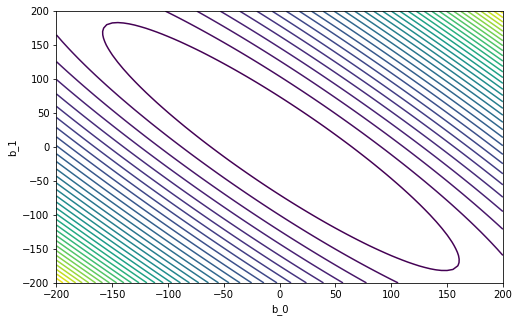

In [25]:
# plot the countours of the MSE
plt.figure(figsize=(8,5)) # set the figure size
plt.contour(b_0_grid, b_1_grid, f_grid,40)
plt.xlabel('b_0')
plt.ylabel('b_1')
plt.show()

The linear coefficients $(b_0^*, b_1^*)$ lie in the center of the above surface. We will now implement a gradient descent (GD) routine to find them. Of course, in the case of linear of regression, we can compute them analytically like in the previous section. This will only be an illustration of how GD works.

Before implementing GD, write a function that computes the gradient of $f(b_0, b_1)$. Recall that the gradient in this case is a 2-dimensional vector $\nabla_f = \left( \frac{\partial f(b_0,b_1)}{\partial b_0}, \frac{\partial f(b_0,b_1)}{\partial b_1 }\right)$.

In [26]:
def gradient_mse(b_vector, x, y):
    ''' Computes the gradient of the MSE given data x and y. '''
    # extract b's
    b_0 = b_vector[0]
    b_1 = b_vector[1]
    
    grad = np.zeros(2)
    
    ###############################################################
    ###############################################################
    # your code starts here
    ###############################################################

    x = np.array(x)
    y = np.array(y)
    err = y - b_0 - b_1 * x
    n = len(x)
    partial_b_0 = -2 * np.sum(err) / n
    partial_b_1 = -2 * np.sum(err * x) / n
    
    grad[0] = partial_b_0
    grad[1] = partial_b_1

    ###############################################################
    # your code ends here
    ###############################################################
    ###############################################################
    
    return grad

#### Question 12
Input manually on the quiz page.

In [27]:
# question 12
b_0 = 0.0
b_1 = 0.0
b_vec = np.array([b_0, b_1])
grad = gradient_mse(b_vec, x, y)
print('df_db0 = ' + str(np.round(grad[0],4)))

df_db0 = -3.1628


#### Question 13
Input manually on the quiz page.

In [28]:
# question 13
print('df_db1 = ' + str(np.round(grad[1],4)))

df_db1 = -2.6948


#### Question 14
Input manually on the quiz page.

In [29]:
# question 14
b_0 = -100.0
b_1 = -100.0
b_vec = np.array([b_0, b_1])
grad = gradient_mse(b_vec, x, y)
print('df_db0 = ' + str(np.round(grad[0],2)))

df_db0 = -363.97


#### Question 15
Input manually on the quiz page.

In [30]:
# question 15
print('df_db1 = ' + str(np.round(grad[1],2)))

df_db1 = -316.8


### Gradient descent (GD) and the importance of the learning rate
#### Questions 16 to 21 of the quiz "Interest Rate Instruments Assignment Part IV"

Now, we will code a very simplified implementation of GD. Recall that GD is an iterative procedure that updates the current the parameter vector $b^k = (b_0^k, b_1^k)$ as follows:

$b^{k+1} = b^k - \gamma \nabla_f(b^k)$,

where $\gamma > 0$ is the **learning rate** and $\nabla_f(b_k)$ is the gradient evaluated at the current iteration. Write a function that, given $b^k$ and $\gamma > 0$, computes $b^{k+1}$.

In [31]:
def step_gd(b_vec_old, gamma, x, y):
    ''' Computes one GD step. '''
    
    b_vec_new = np.zeros(2)
    
    ###############################################################
    ###############################################################
    # your code starts here
    ###############################################################

    grad_old = gradient_mse(b_vec_old, x, y)
    b_vec_new = b_vec_old - gamma * grad_old

    ###############################################################
    # your code ends here
    ###############################################################
    ###############################################################
    
    return b_vec_new

The GD implementation consists on calling the above function $m$ times, starting from an initial point $b_0$. It returns a matrix with all the iterations $b_0, b_1, \ldots, b_m$. If $m$ is sufficiently large and the learning rate $\gamma$ is adequate (not too small or large), then the sequence of $b_k$'s should converge to the optimal $b^* = (b_0^*, b_1^*)$.

In [32]:
def gradient_descent(b_vec0, gamma, m, x, y):
    ''' Simplified gradient descent implementation. '''
    
    b_matrix = np.zeros([m + 1, 2])
    b_matrix[0] = b_vec0
    for k in range(m):
        b_matrix[k + 1] = step_gd(b_matrix[k], gamma, x, y)      
    
    return b_matrix

#### Question 16
Input manually on the quiz page.

In [33]:
# question 16
b_vec0 = [-150, -150]
gamma = 0.3
m = 5
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
print('b_0 = ' + str(np.round(b_vec_gd[-1][0], 4)))

b_0 = 9.0045


#### Question 17
Input manually on the quiz page.

In [34]:
# question 17
print('b_1 = ' + str(np.round(b_vec_gd[-1][1], 4)))

b_1 = -8.5341


#### Question 18
Input manually on the quiz page.

In [35]:
# question 18
b_vec0 = [150, 50]
gamma = 0.1
m = 10
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
print('b_0 = ' + str(np.round(b_vec_gd[-1][0], 4)))

b_0 = 36.9246


#### Question 19
Input manually on the quiz page.

In [36]:
# question 19
print('b_1 = ' + str(np.round(b_vec_gd[-1][1], 4)))

b_1 = -37.2826


The choice of the learning rate $\gamma$ could determine the outcome of the GD. On on hand, small values of $\gamma$ will give us very slow convergence. On the other hand, large values of $\gamma$ will make the GD diverge! We test different values for $\gamma$.

In [37]:
# fix the initial point
b_vec0 = [175, 25]
# number of iterations
m = 300

#### Case 1
$\gamma = 0.005$

In [38]:
gamma = 0.005
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
# this is the last point
print('b_m = ' + str(b_vec_gd[-1]))

b_m = [ 52.20228377 -57.12526282]


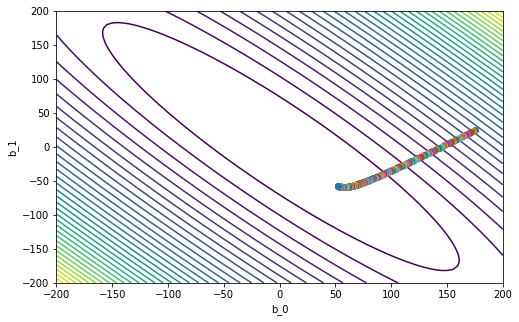

In [39]:
# plot the countours of the MSE
plt.figure(figsize=(8,5)) # set the figure size
plt.contour(b_0_grid, b_1_grid, f_grid,40)
plt.xlabel('b_0')
plt.ylabel('b_1')

# plot our GD iterations
plt.plot(b_vec_gd[0,0], b_vec_gd[0,1], 'o')
for k in range(m):
    plt.plot(b_vec_gd[k+1,0], b_vec_gd[k+1,1], 'o')
    plt.plot(b_vec_gd[k : k+2, 0], b_vec_gd[k : k+2, 1], '--r')

plt.show()

#### Case 2
$\gamma = 0.1$

In [40]:
gamma = 0.1
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
# this is the last point
print('b_m = ' + str(b_vec_gd[-1]))

b_m = [ 1.94081301 -0.3706432 ]


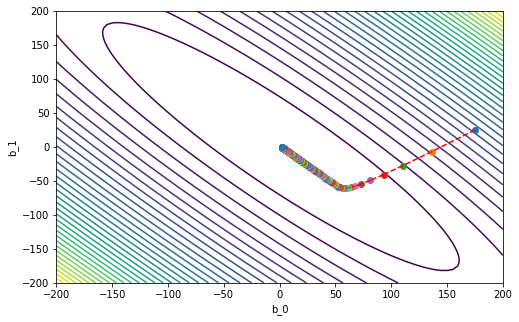

In [41]:
# plot the countours of the MSE
plt.figure(figsize=(8,5)) # set the figure size
plt.contour(b_0_grid, b_1_grid, f_grid,40)
plt.xlabel('b_0')
plt.ylabel('b_1')

# plot our GD iterations
plt.plot(b_vec_gd[0,0], b_vec_gd[0,1], 'o')
for k in range(m):
    plt.plot(b_vec_gd[k+1,0], b_vec_gd[k+1,1], 'o')
    plt.plot(b_vec_gd[k : k+2, 0], b_vec_gd[k : k+2, 1], '--r')

plt.show()

#### Case 3
$\gamma = 0.55$

In [42]:
gamma = 0.55
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
# this is the last point
print('b_m = ' + str(b_vec_gd[-1]))

b_m = [ 1.07304106  0.63223684]


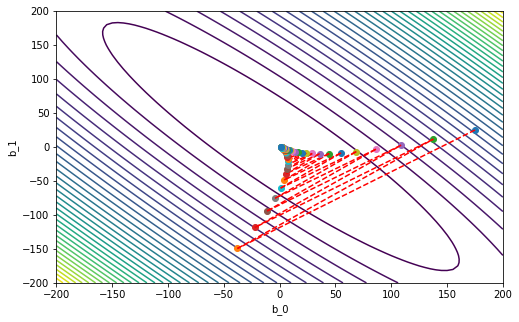

In [43]:
# plot the countours of the MSE
plt.figure(figsize=(8,5)) # set the figure size
plt.contour(b_0_grid, b_1_grid, f_grid,40)
plt.xlabel('b_0')
plt.ylabel('b_1')

# plot our GD iterations
plt.plot(b_vec_gd[0,0], b_vec_gd[0,1], 'o')
for k in range(m):
    plt.plot(b_vec_gd[k+1,0], b_vec_gd[k+1,1], 'o')
    plt.plot(b_vec_gd[k : k+2, 0], b_vec_gd[k : k+2, 1], '--r')

plt.show()

#### Case 4
$\gamma = 0.5905$

In [44]:
gamma = 0.5905
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
# this is the last point
print('b_m = ' + str(b_vec_gd[-1]))

b_m = [ 248.76153639  214.95211362]


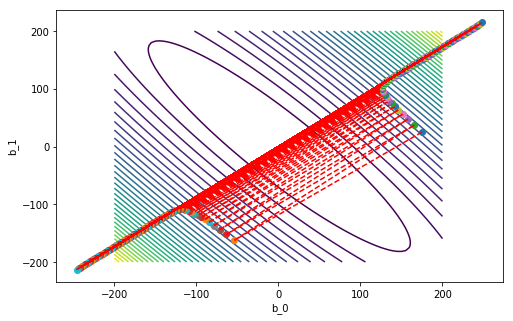

In [45]:
# plot the countours of the MSE
plt.figure(figsize=(8,5)) # set the figure size
plt.contour(b_0_grid, b_1_grid, f_grid,40)
plt.xlabel('b_0')
plt.ylabel('b_1')

# plot our GD iterations
plt.plot(b_vec_gd[0,0], b_vec_gd[0,1], 'o')
for k in range(m):
    plt.plot(b_vec_gd[k+1,0], b_vec_gd[k+1,1], 'o')
    plt.plot(b_vec_gd[k : k+2, 0], b_vec_gd[k : k+2, 1], '--r')

plt.show()

After a visual inspection of the previous 4 cases, select a suitable value for $\gamma$.

In [46]:
###############################################################
###############################################################
# your code starts here
###############################################################
gamma = 0.55
###############################################################
# your code ends here
###############################################################
###############################################################

#### Question 20
Input manually on the quiz page.

In [47]:
# question 20
b_vec0 = [175, 25]
m = 300
b_vec_gd = gradient_descent(b_vec0, gamma, m, x, y)
print('b_0_star = ' + str(np.round(b_vec_gd[-1, 0], 4)))

b_0_star = 1.073


#### Question 21
Input manually on the quiz page.

In [48]:
print('b_1_star = ' + str(np.round(b_vec_gd[-1, 1], 4)))

b_1_star = 0.6322


In [49]:
###############################################################
###############################################################
# your code starts here
###############################################################
# delete the whole cell in student version !!!
# this is the analytical solution
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y)
print(regr.intercept_)
print(regr.coef_[0])
###############################################################
# your code ends here
###############################################################
###############################################################

1.07304105745
0.632236846818
